**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO *PREDICT (CLASSIFY) WINE QUALITY USING RANDOMFORESTCLASSIFIER*. 🐍🍷🌲🤖**

This script trains a **Random Forest** classifier to predict wine *quality labels*.

It first tries to use a local **UCI Wine Quality** CSV (red/white). If not found, it **falls back** to scikit-learn’s built-in **load_wine** dataset and treats its class labels as quality tiers (stand-in), so the notebook runs anywhere.

### **📦 Imports**

We’ll use pandas for data handling, scikit-learn for modeling & metrics, and matplotlib for visuals.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

### **🧩 Load Dataset (Robust: Use local UCI CSV if available → else fallback to load_wine)**

- If `winequality-red.csv` or `winequality-white.csv` exists in the working folder, we’ll load it and treat **quality** as the label.
- Otherwise, we’ll use `load_wine()` (3 classes) as a quality proxy so the demo is fully runnable.

In [2]:
from sklearn.datasets import load_wine

# Try local UCI CSVs first
csv_candidates = ["winequality-red.csv", "winequality-white.csv"]
csv_path = next((p for p in csv_candidates if os.path.exists(p)), None)

if csv_path:
    df = pd.read_csv(csv_path, sep=";")  # UCI CSVs are semicolon-separated
    print(f"✅ Using local dataset: {csv_path}")
    # UCI winequality target is typically an integer 3–8 (quality score). We'll model it as multiclass classification.
    X = df.drop(columns=["quality"])
    y = df["quality"].astype(int)
    feature_names = X.columns.tolist()
    dataset_name = f"UCI Wine Quality ({'red' if 'red' in csv_path else 'white'})"
else:
    print("⚠️ Local UCI CSV not found. Falling back to scikit-learn `load_wine()`.")
    wine = load_wine(as_frame=True)
    df = wine.frame.copy()
    # Use built-in class (0/1/2) as quality tiers for a drop-in classification demo
    X = df.drop(columns=["target"])
    y = df["target"]
    feature_names = X.columns.tolist()
    dataset_name = "sklearn load_wine (class tiers as quality)"

df.head()

⚠️ Local UCI CSV not found. Falling back to scikit-learn `load_wine()`.


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **✂️ Train/Test Split**

We’ll reserve 20% for testing to evaluate generalization.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

### **🌲 Train a RandomForestClassifier**

Random Forests are robust, handle non-linearities, and work well **without scaling**.

In [4]:
rf = RandomForestClassifier(
    n_estimators=300,      # more trees → stabler estimates
    max_depth=None,        # let trees grow; forest reduces overfitting
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### **📊 Evaluate the Model (Accuracy + Classification Report)**

We’ll check overall accuracy and class-wise precision/recall/F1.

In [5]:
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Dataset: {dataset_name}")
print(f"Accuracy: {acc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Dataset: sklearn load_wine (class tiers as quality)
Accuracy: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### **🧩 Confusion Matrix (Visual)**

A confusion matrix helps you see where the model confuses adjacent quality levels/classes.

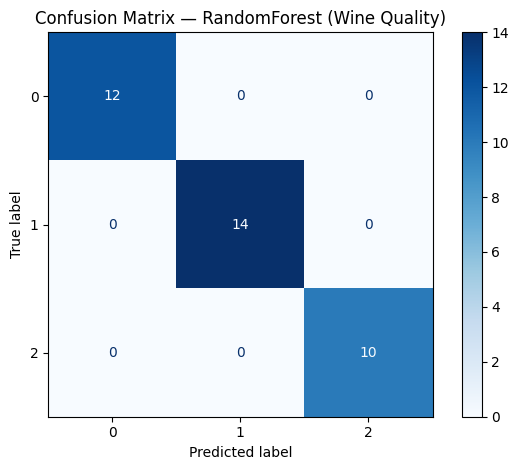

In [6]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
disp.ax_.set_title("Confusion Matrix — RandomForest (Wine Quality)")
plt.tight_layout()
plt.show()

### **🌟 Feature Importance (Global Insight)**

Which chemical properties influence the model’s decisions most?

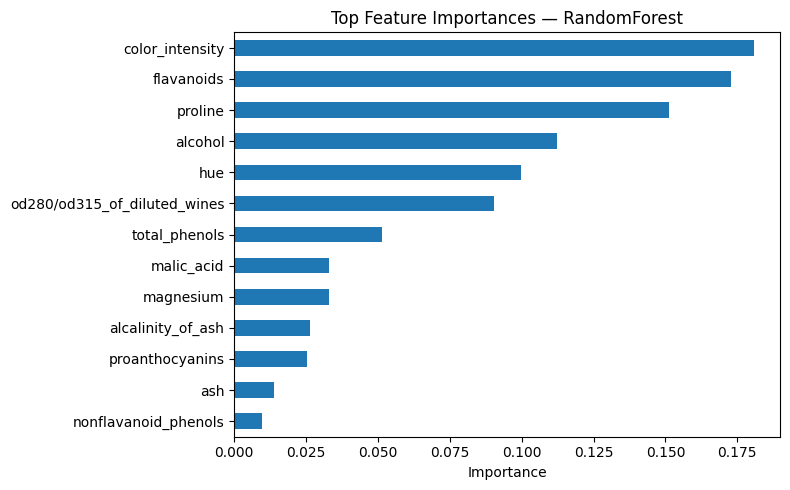

color_intensity                 0.180805
flavanoids                      0.172865
proline                         0.151067
alcohol                         0.112384
hue                             0.099592
od280/od315_of_diluted_wines    0.090361
total_phenols                   0.051563
malic_acid                      0.033140
magnesium                       0.032820
alcalinity_of_ash               0.026338
proanthocyanins                 0.025445
ash                             0.013848
nonflavanoid_phenols            0.009773
dtype: float64

In [7]:
importances = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
importances.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Feature Importances — RandomForest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

importances.head(15)

### **✅ Notes & Tips**

- **If using the UCI CSVs**, you’re modeling *true quality scores* as a multiclass label. Consider:
    - Merging rare classes (e.g., map 3–4→4, 8–9→8) to reduce class sparsity.
    - Trying **class_weight=‘balanced’** if your quality distribution is imbalanced.
- **If on fallback (load_wine)**, you’re classifying varietal classes (0/1/2) as a *quality tier proxy* purely for demonstration.
- For regression on actual quality (0–10), switch to **RandomForestRegressor** and use **MAE/RMSE/R²** instead of accuracy/F1.